# Related to figure 5j-k

In [3]:
library(Signac)
library(Seurat)
library(glue)
library(repr)
library(ggpubr)

The legacy packages maptools, rgdal, and rgeos, underpinning this package
will retire shortly. Please refer to R-spatial evolution reports on
https://r-spatial.org/r/2023/05/15/evolution4.html for details.
This package is now running under evolution status 0 

Attaching SeuratObject

Loading required package: ggplot2



In [4]:
obj <- readRDS(glue('/data/yuchen_data/Stereo_seq/All_Figures/Figure4/1.data//CoEmbed.rds'))
obj

An object of class Seurat 
171740 features across 12473 samples within 3 assays 
Active assay: RNA (15119 features, 0 variable features)
 2 other assays present: peaks, GeneActivity
 2 dimensional reductions calculated: pca, umap

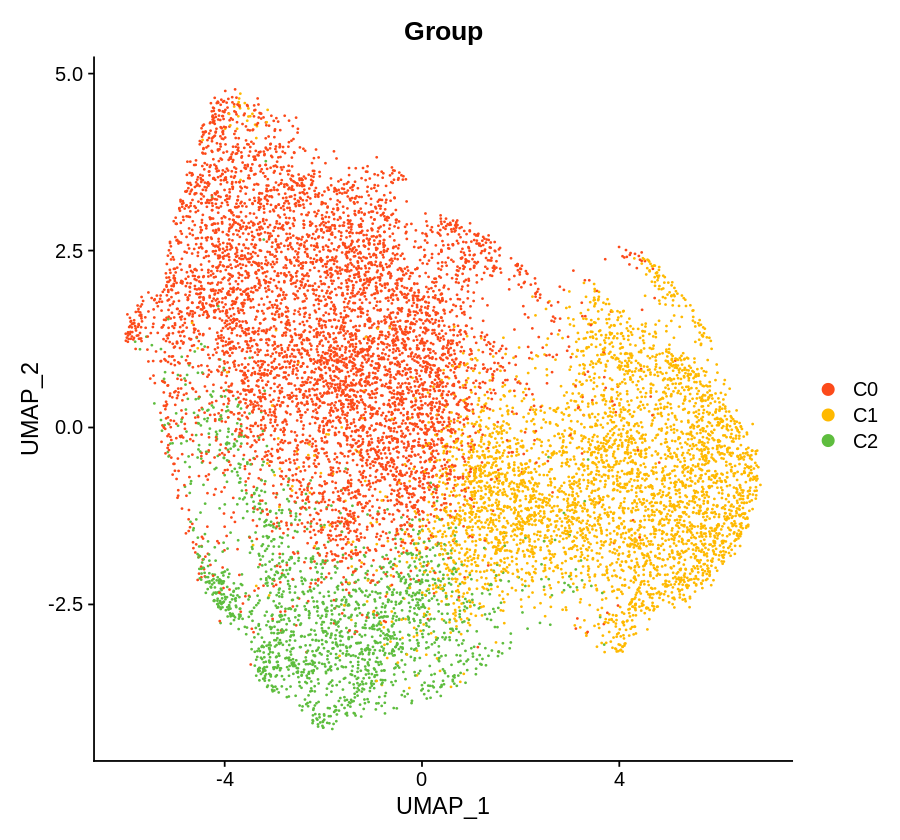

In [5]:
mycolors = c("#fc4a1a", "#ffb900", "#5ebd3e")
obj$Group = paste0('C', obj$seurat_clusters)

options(repr.plot.width=7.5, repr.plot.height=7)
DimPlot(obj, group.by='Group', cols=mycolors)

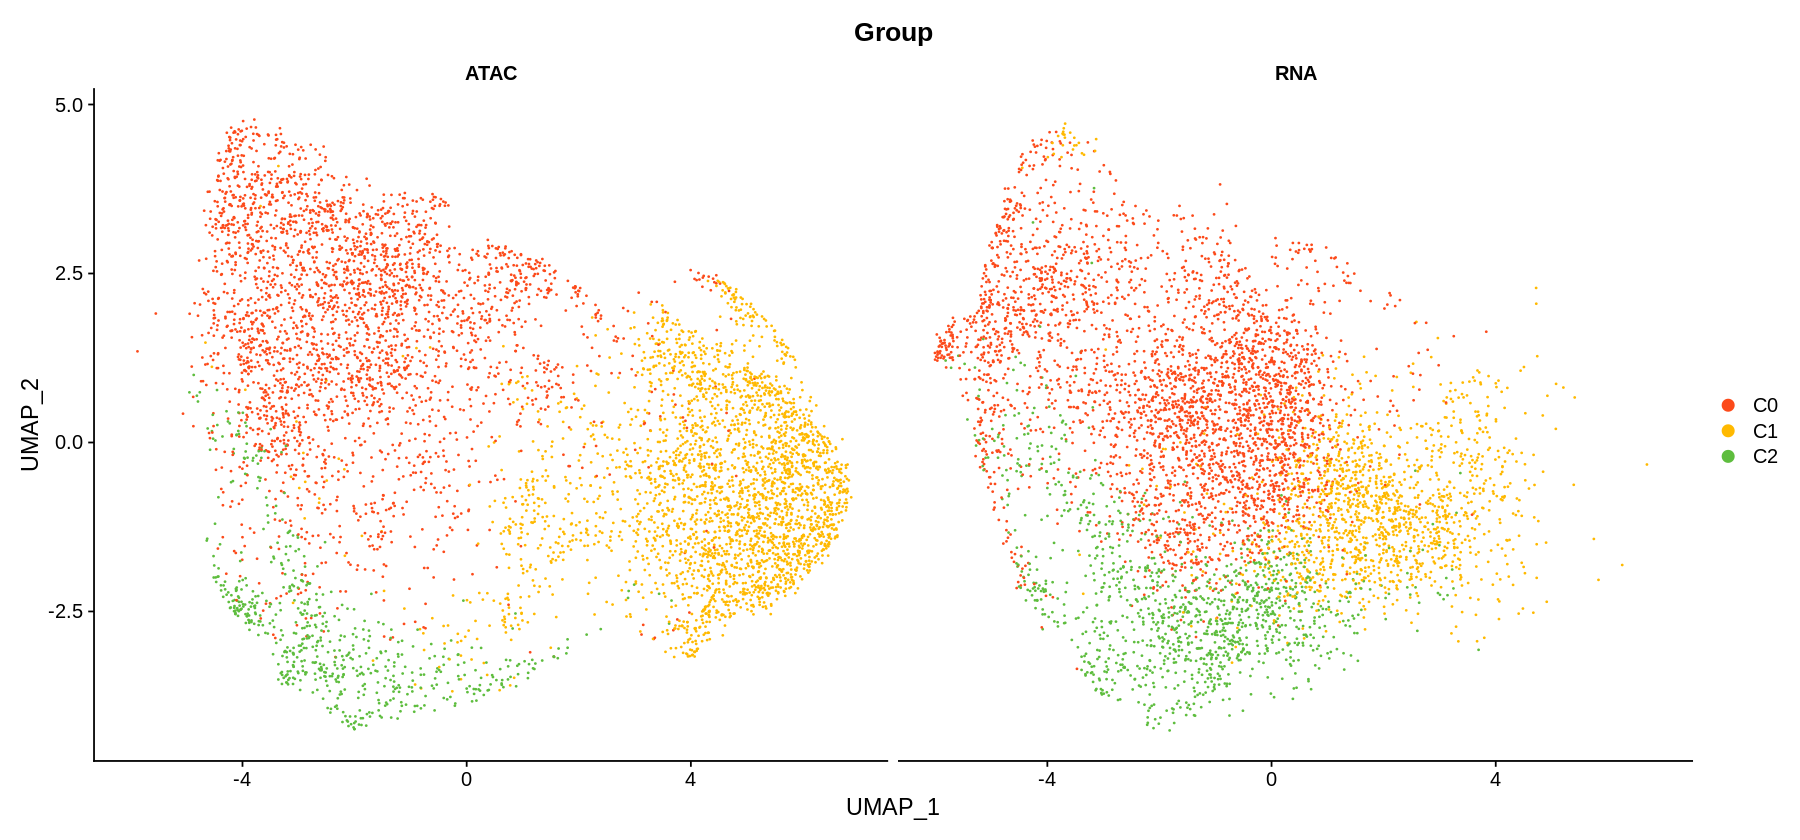

In [6]:
options(repr.plot.width=15, repr.plot.height=7)
DimPlot(obj, group.by='Group', split.by='datasets', cols=mycolors)

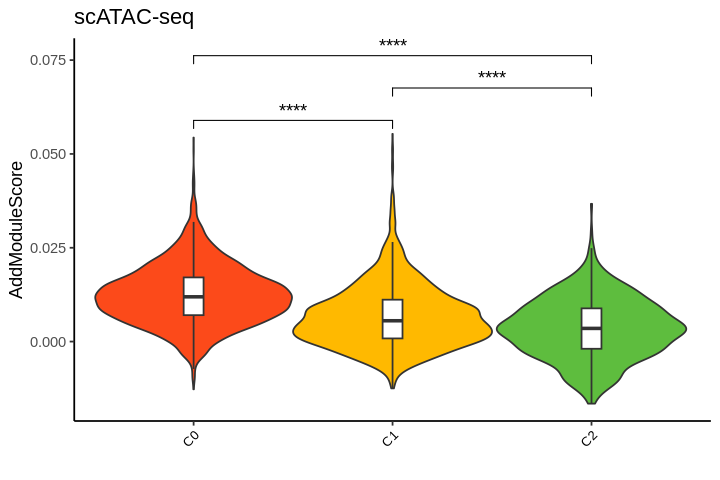

In [9]:
options(repr.plot.width=6, repr.plot.height=4)
obj_plot_1 = subset(obj, subset= datasets=='ATAC')
mylist <- list(c('C0', 'C1'), c('C1', 'C2'), c('C0', 'C2'))
gene = 'KEGG_TRYPTOPHAN_METABOLISM.addmodulescore'
df_plot1 = obj_plot_1@meta.data[, c('seurat_clusters', 'KEGG_TRYPTOPHAN_METABOLISM.addmodulescore')]
df_plot1$seurat_clusters = paste0('C', df_plot1$seurat_clusters)
df_plot1$seurat_clusters <- factor(df_plot1$seurat_clusters, levels=c('C0', 'C1', 'C2'))
df_plot1$plot = df_plot1[[gene]]

ggplot(data.frame(df_plot1), aes(seurat_clusters, plot ,fill=seurat_clusters))+
    geom_violin(width=1)+
    scale_fill_manual(limits=c("C0","C1", "C2"),
                    values=mycolors)+ #颜色
    stat_compare_means(comparisons=mylist,label="p.format",method = 'wilcox.test', symnum.args=list(cutpoints = c(0, 0.0001, 0.001, 0.01, 0.05, 1),symbols = c("****", "***", "**", "*", "ns"))) +
    guides(fill=FALSE) +
    geom_boxplot(width=0.1, fill="white", outlier.alpha=0)+
    labs(title = 'scATAC-seq',x = '',y = 'AddModuleScore' ) +
    theme(
    plot.subtitle = element_text(color = 'black', size   = 16,hjust = 0.5),
    plot.caption  = element_text(color = 'black', size   = 16,face = 'italic', hjust = 1),
    axis.text.x   = element_text(color = 'black', size = 8, angle = 45,hjust = 1),#
    legend.title  = element_text(color = 'black', size  = 16),
    legend.text   = element_text(color = 'black', size   = 16),
    axis.line.y = element_line(color = 'black', linetype = 'solid'), # y轴线特征
    axis.line.x = element_line (color = 'black',linetype = 'solid'), # x轴线特征
    panel.background=element_rect(fill="white")
    )


Warning message:
“The following features are not present in the object: AANAT, ASMT, CYP1A2, TPH2, WARS1, not searching for symbol synonyms”


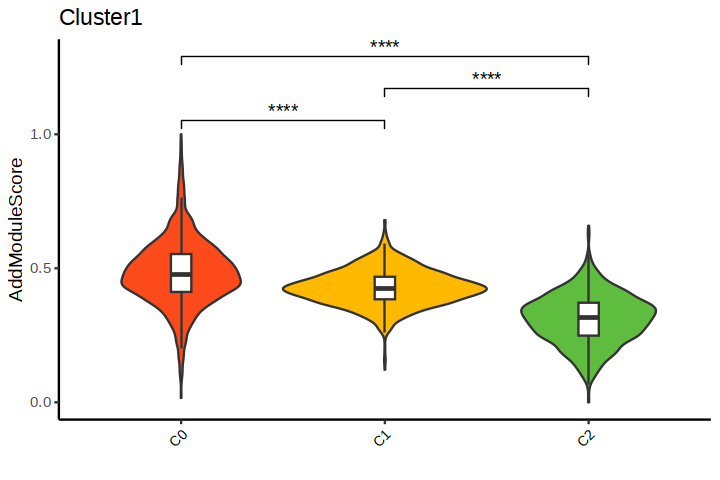

In [15]:
obj_rna = subset(obj, subset=datasets=='RNA')

library(msigdbr)
all_gene_sets <- msigdbr(species = "Homo sapiens")
all_gene_sets <- as.data.frame(all_gene_sets)
gl <- list()
gl[['KEGG_TRYPTOPHAN_METABOLISM']] = unique(all_gene_sets$gene_symbol[all_gene_sets$gs_name == 'KEGG_TRYPTOPHAN_METABOLISM'])

df_magic = read.table('/data/yuchen_data/Stereo_seq/All_Figures/Figure4/1.data/scRNA.counts.magic.txt', sep='\t', row.names=1, header=T)
colnames(df_magic) = gsub('\\.', '-', colnames(df_magic))
obj_rna[["magic"]] <- CreateAssayObject(data = as.matrix(df_magic))
DefaultAssay(obj_rna) <- 'magic'
obj_rna <- AddModuleScore(obj_rna, gl)

mylist <- list(c('C0', 'C1'), c('C1', 'C2'), c('C0', 'C2'))
gene = 'Cluster1'
df_plot1 = obj_rna@meta.data[, c('seurat_clusters', 'Cluster1')]
df_plot1$seurat_clusters = paste0('C', df_plot1$seurat_clusters)
df_plot1$seurat_clusters <- factor(df_plot1$seurat_clusters, levels=c('C0', 'C1', 'C2'))
df_plot1$plot = df_plot1[[gene]]
df_plot1$plot = (df_plot1$plot - min(df_plot1$plot)) / (max(df_plot1$plot) - min(df_plot1$plot))

ggplot(data.frame(df_plot1), aes(seurat_clusters, plot ,fill=seurat_clusters))+
    geom_violin(width=1)+
    scale_fill_manual(limits=c("C0","C1", "C2"),
                    values=mycolors)+ #颜色
    stat_compare_means(comparisons=mylist,label="p.format",method = 'wilcox.test', symnum.args=list(cutpoints = c(0, 0.0001, 0.001, 0.01, 0.05, 1),symbols = c("****", "***", "**", "*", "ns"))) +
    guides(fill=FALSE) +
    geom_boxplot(width=0.1, fill="white", outlier.alpha=0)+
    labs(title = gene,x = '',y = 'AddModuleScore' ) +
    theme(
    plot.subtitle = element_text(color = 'black', size = 16,hjust = 0.5),
    plot.caption  = element_text(color = 'black', size = 16,face = 'italic', hjust = 1),
    axis.text.x   = element_text(color = 'black', size = 8, angle = 45,hjust = 1),#
    legend.title  = element_text(color = 'black', size = 16),
    legend.text   = element_text(color = 'black', size = 16),
    axis.line.y = element_line(color = 'black', linetype = 'solid'), # y轴线特征
    axis.line.x = element_line (color = 'black',linetype = 'solid'), # x轴线特征
    panel.background=element_rect(fill="white"))